In [1]:
from loadTDMS import *
from fft_test import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

## 練習

### lambda

In [7]:
def calc(base, height):
    return base*height/2

In [8]:
(lambda base, height: base*height/2)(5,10)

25.0

In [9]:
func = lambda base, height: base*height/2
func(5,10)

25.0

In [11]:
# studentsの中を全部大文字にしたい
students = ['Paku', 'PARK', 'paku', 'PArk', 'Matsuda', 'mAtsUdA' ,'HIDAKA', 'hidakA']

In [13]:
# for分
new_students = []
for student in students:
    new_students.append(student.upper())
new_students

['PAKU', 'PARK', 'PAKU', 'PARK', 'MATSUDA', 'MATSUDA', 'HIDAKA', 'HIDAKA']

In [14]:
#内包表記
[student.upper() for student in students]

['PAKU', 'PARK', 'PAKU', 'PARK', 'MATSUDA', 'MATSUDA', 'HIDAKA', 'HIDAKA']

In [15]:
# lambda
# mapの中（どんな処理、対象のリスト）
list(map(lambda student: student.upper(), students))

['PAKU', 'PARK', 'PAKU', 'PARK', 'MATSUDA', 'MATSUDA', 'HIDAKA', 'HIDAKA']

In [154]:
np.concatenate([[1,1,2], [0,0],[1,1,1]])

array([1, 1, 2, 0, 0, 1, 1, 1])

### 例

In [173]:
i = np.arange(0,7)
a = np.array(
        list(map(
            lambda i: np.concatenate([np.arange(101,106),np.zeros(5)]) if i%2==0 
                else np.concatenate([np.arange(101,104),np.zeros(2),np.arange(104,106),np.zeros(3)]),i)), dtype=object)

for i in range(len(a)):
    if i == 0:
        b = a[0]
    else:
        b = np.concatenate([b,a[i]])

b = b.astype(int)

print(len(b))
b

70


array([101, 102, 103, 104, 105,   0,   0,   0,   0,   0, 101, 102, 103,
         0,   0, 104, 105,   0,   0,   0, 101, 102, 103, 104, 105,   0,
         0,   0,   0,   0, 101, 102, 103,   0,   0, 104, 105,   0,   0,
         0, 101, 102, 103, 104, 105,   0,   0,   0,   0,   0, 101, 102,
       103,   0,   0, 104, 105,   0,   0,   0, 101, 102, 103, 104, 105,
         0,   0,   0,   0,   0])

In [212]:
b = np.array([0,0,0,0,0,0,101,102,103,0,0,104,105,0,0,0,0,0,101, 102, 103, 104, 105,   0,   0,   0,   0,   0, 101, 102, 103,
         0,   0, 104, 105,   0,   0,   0, 101, 102, 103, 104, 105,   0,
         0,   0,   0,   0, 101, 102, 103,   0,   0, 104, 105,   0,   0,
         0, 101, 102, 103, 104, 105,   0,   0,   0,   0,   0, 101, 102,
       103,   0,   0, 104, 105,   0,   0,   0, 101, 102, 103, 104, 105,
         0,   0,   0,   0,   0])

In [213]:
# plt.plot(b)

In [214]:
# bの中で値が0でない要素のindex番号を取得
# 返り値は tuple型　（0でない要素のindex番号のnp_array)
print(type(np.where(b!=0)))
print(type(np.where(b!=0)[0]))

<class 'tuple'>
<class 'numpy.ndarray'>


In [215]:
b_w = np.where(b!=0)[0]
b_w

array([ 6,  7,  8, 11, 12, 18, 19, 20, 21, 22, 28, 29, 30, 33, 34, 38, 39,
       40, 41, 42, 48, 49, 50, 53, 54, 58, 59, 60, 61, 62, 68, 69, 70, 73,
       74, 78, 79, 80, 81, 82], dtype=int64)

In [216]:
# b_wで、(a[1] - a[0], a[2] - a[1], a[3] - a[2] ...... a[n] - a[n-1])
# つまり、０じゃない要素のindex番号があるなかで、前後の差分を取る。
# その理由は、前後の差分が１ではない時、そこが０が始まるindex番号らへんを取得できるから
b_wd = b_w[1:] - b_w[:-1]
b_wd

array([1, 1, 3, 1, 6, 1, 1, 1, 1, 6, 1, 1, 3, 1, 4, 1, 1, 1, 1, 6, 1, 1,
       3, 1, 4, 1, 1, 1, 1, 6, 1, 1, 3, 1, 4, 1, 1, 1, 1], dtype=int64)

In [217]:
# a_wddで、1じゃない部分を取得して、元のaと突き合わせるために最後に +1してあげる
b_wdd = np.where(b_wd>3)[0]
print(b_wdd) 
b_wdd = b_wdd + 1
print(b_wdd)

[ 4  9 14 19 24 29 34]
[ 5 10 15 20 25 30 35]


In [218]:
menseki = []

In [219]:
menseki.append(np.sum(np.array(b[0:b_w[b_wdd[0]]])))

for i in range(len(b_wdd)-1):
        menseki.append(np.sum(np.array(b[b_w[b_wdd[i]]:b_w[b_wdd[i+1]]])))
                
menseki.append(np.sum(np.array(b[b_w[b_wdd[-1]] : len(b)])))


In [220]:
menseki

[515, 515, 515, 515, 515, 515, 515, 515]

In [ ]:
for i in range(len(cf_wdd)-1):
        menseki.append(np.sum(np.array(cf_m_avg[cf_w[cf_wdd[i]]:cf_w[cf_wdd[i+1]]])))

## 実際のデータ

In [2]:
#　移動平均のための np_array作成
x = np.linspace(-1,1,100)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

In [316]:
# load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
# d = load_tdms(load_path, ch_num=3)
# d = d[0][start:end]

# dt = 1/10**6
# split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
# overlap = 0.5  # オーバーラップ率
# window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
# y_label = "amplitude"
# y_unit = "V"
# N = len(d)
# t = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)


# fq_, amp_ = FFT_main(t, d, dt, split_t_r, overlap, window_F)

 12%|█▏        | 20/169 [00:13<01:38,  1.51it/s]<ipython-input-3-1d5b32343828>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots()
100%|██████████| 169/169 [02:14<00:00,  1.26it/s]


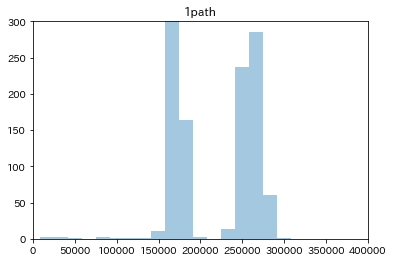

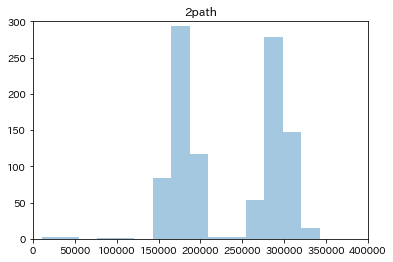

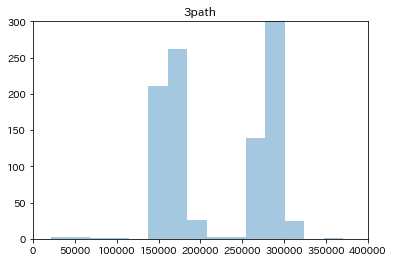

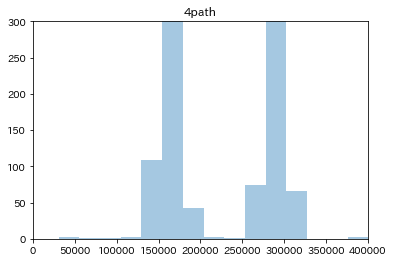

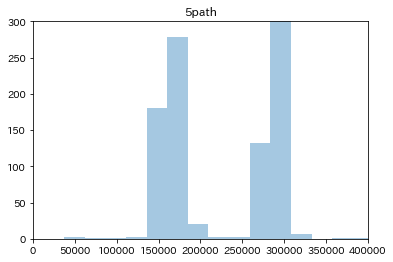

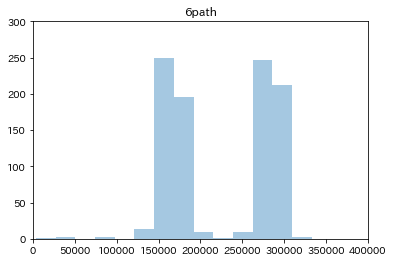

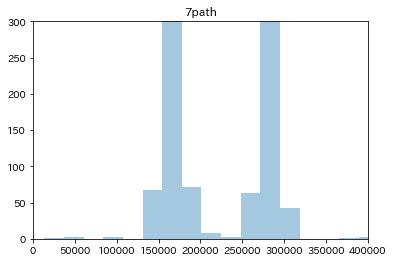

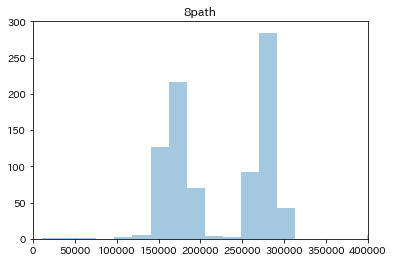

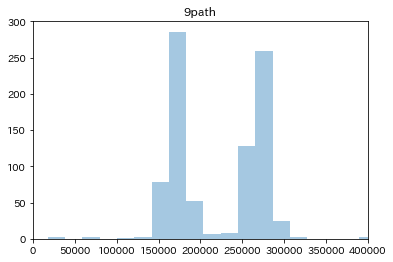

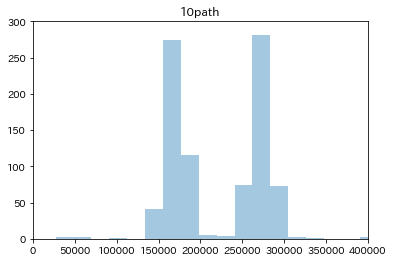

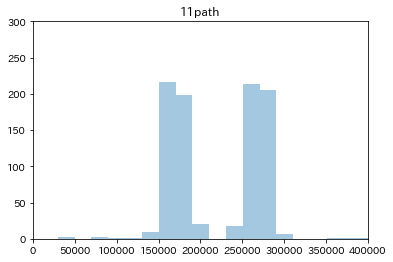

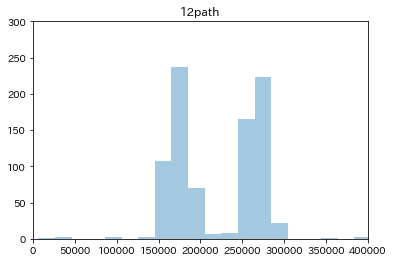

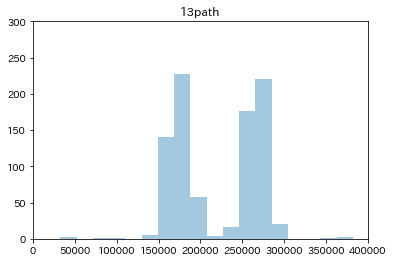

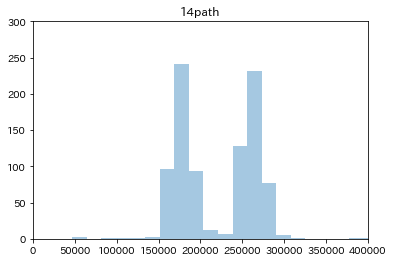

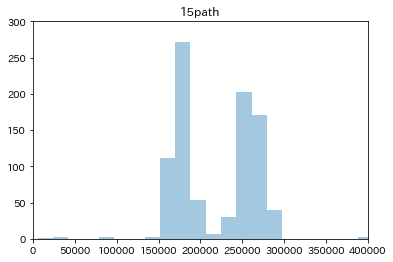

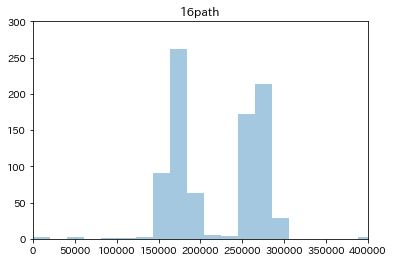

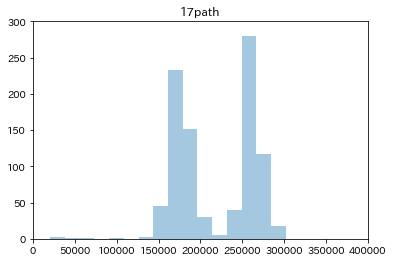

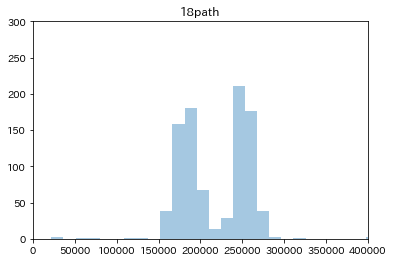

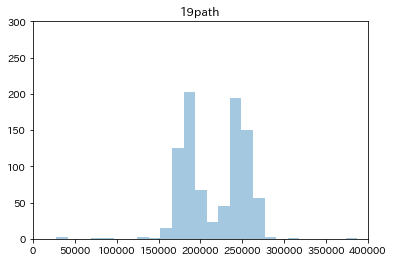

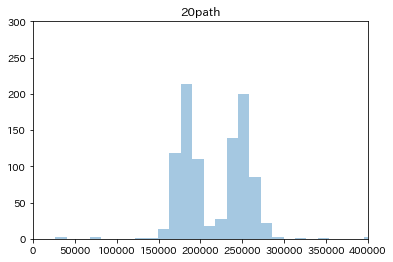

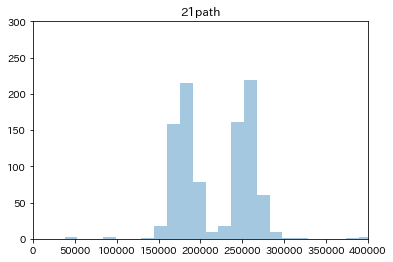

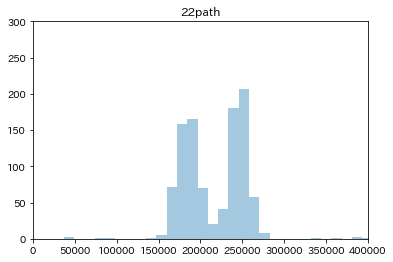

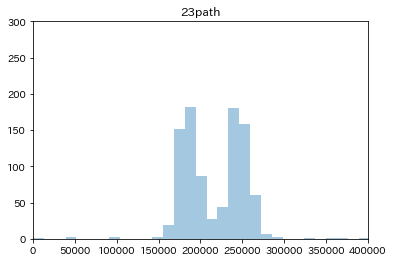

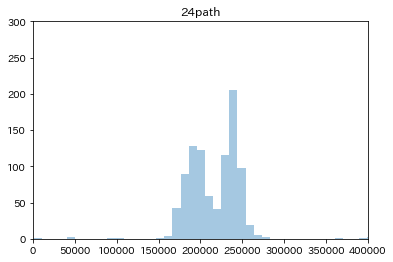

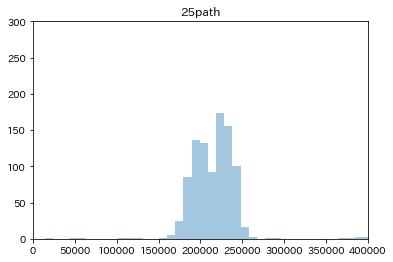

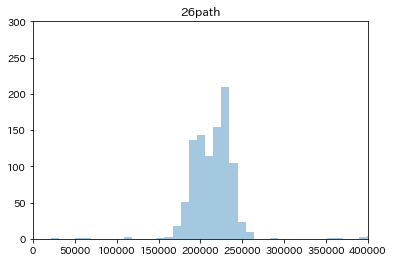

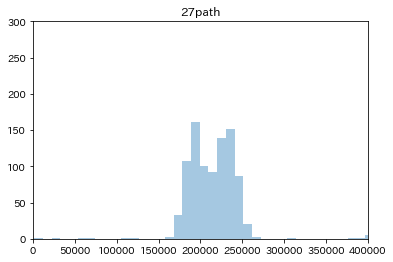

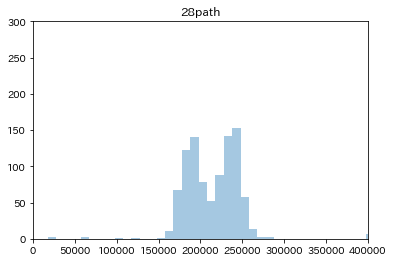

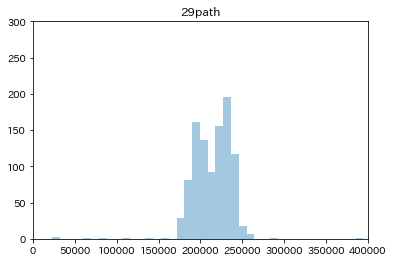

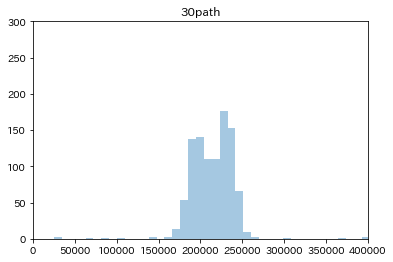

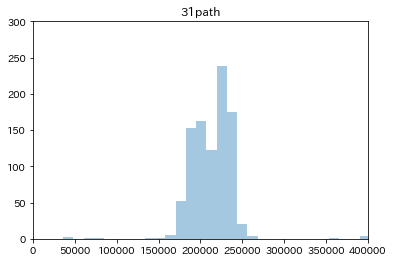

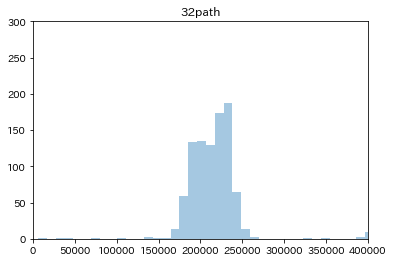

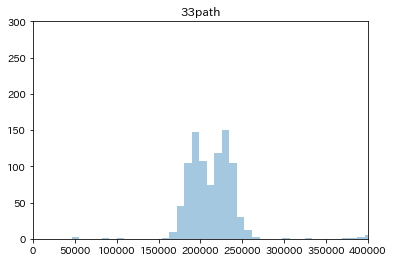

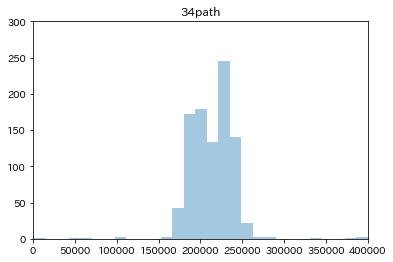

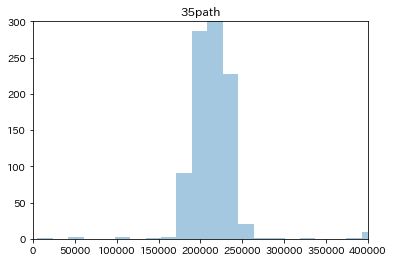

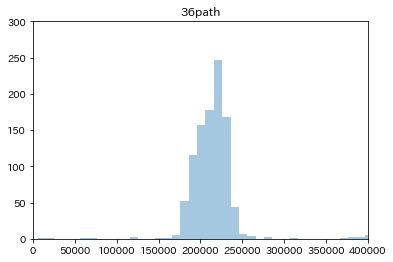

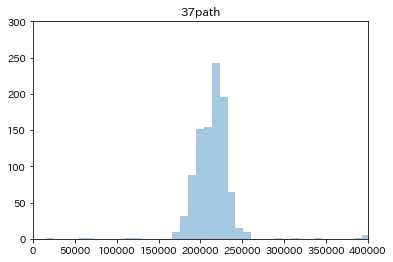

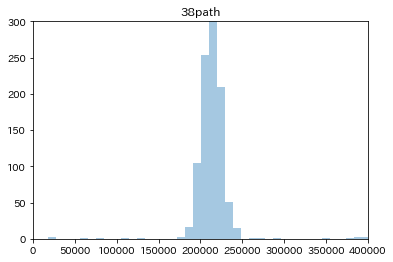

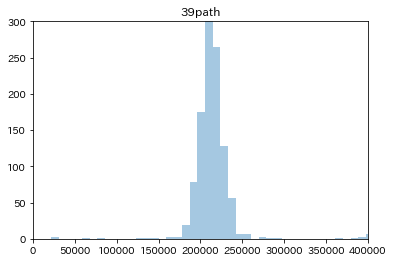

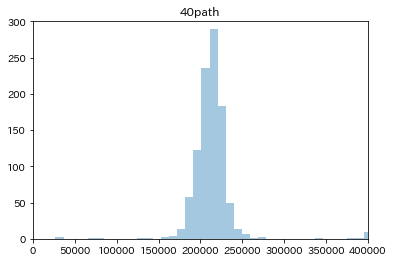

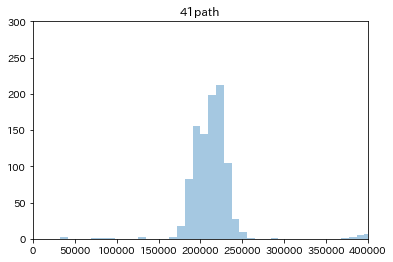

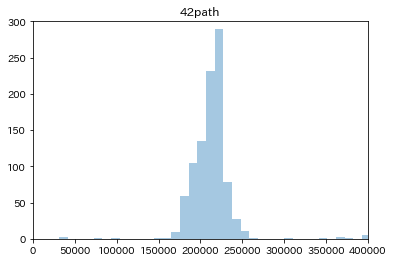

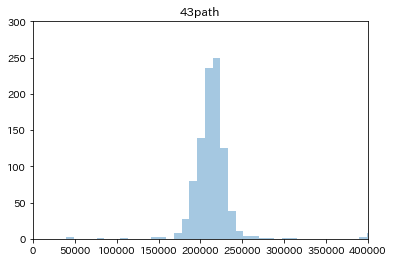

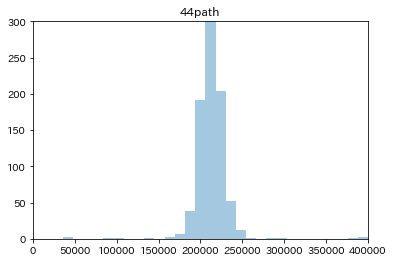

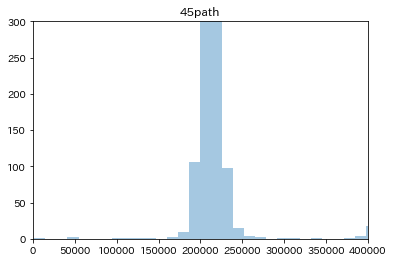

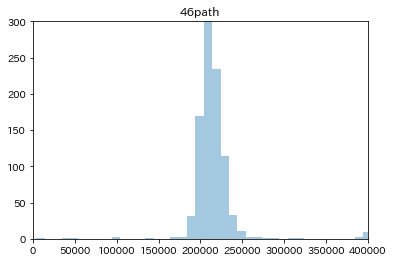

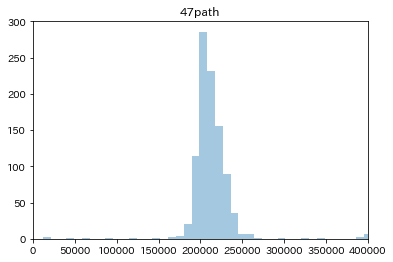

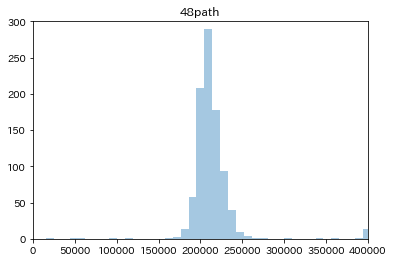

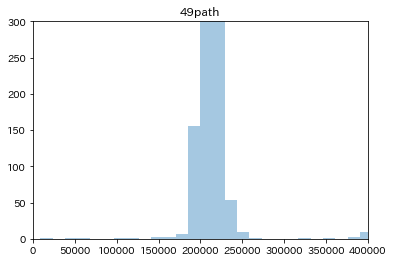

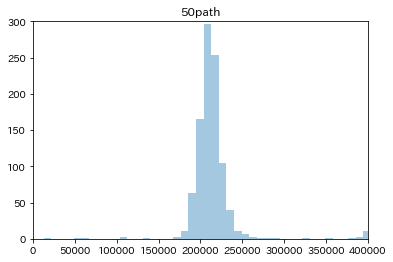

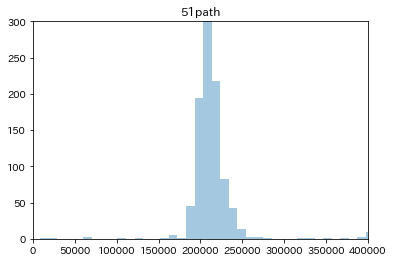

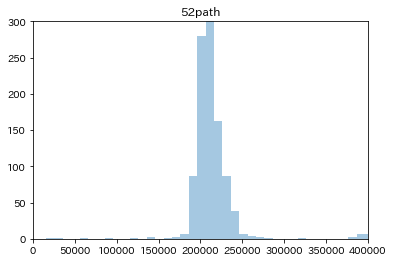

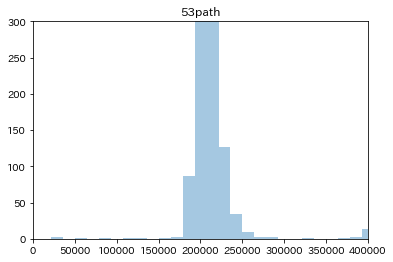

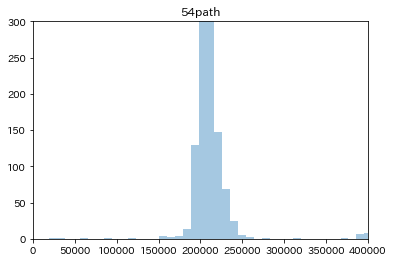

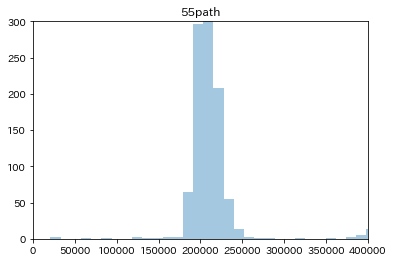

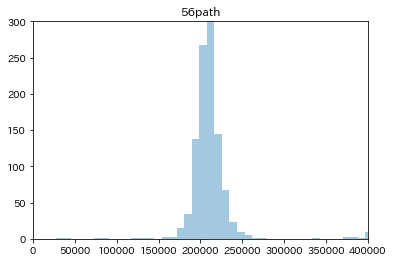

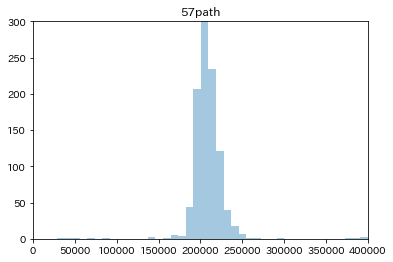

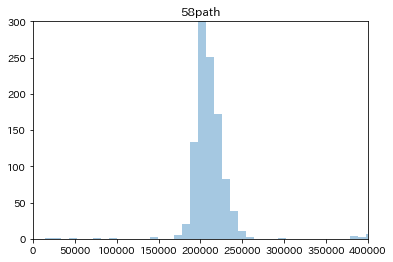

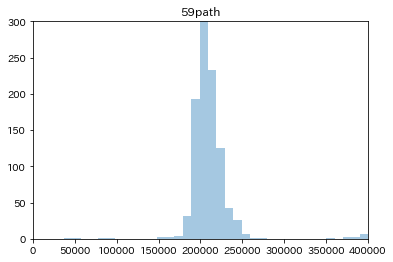

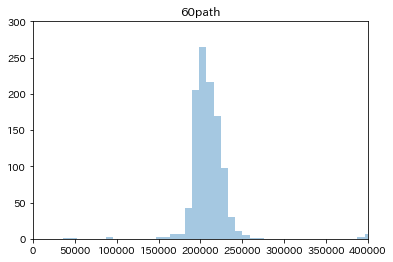

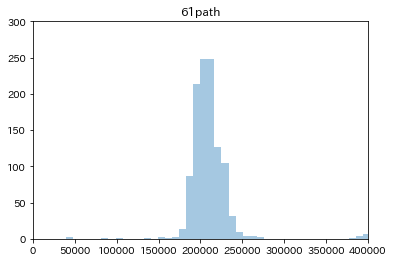

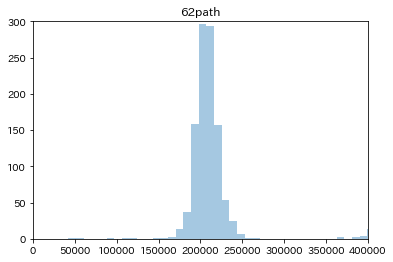

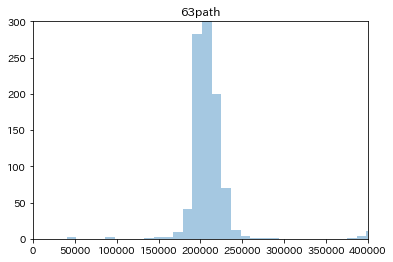

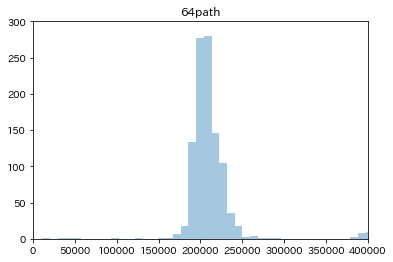

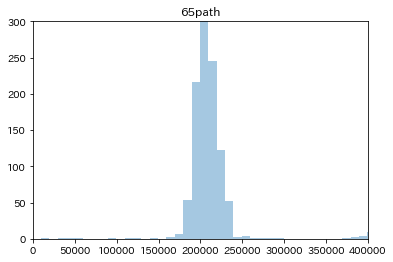

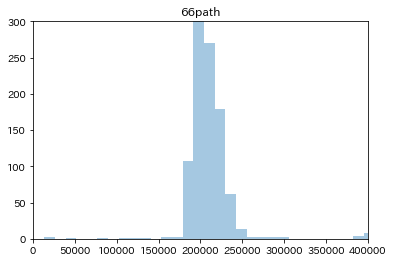

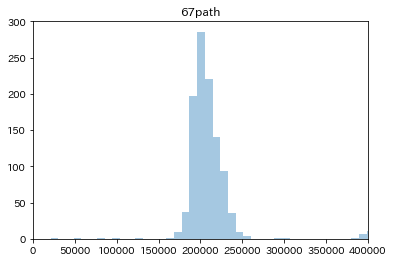

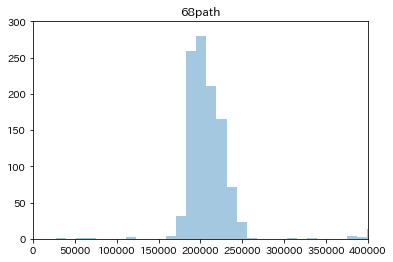

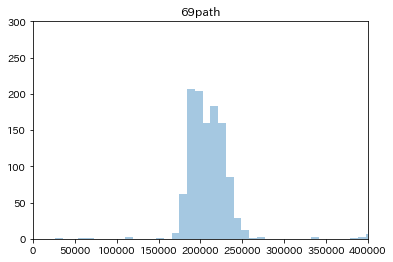

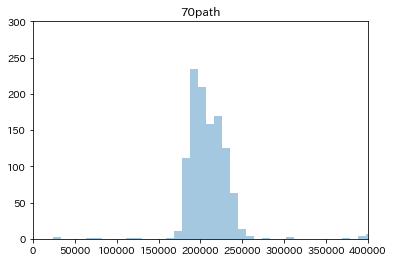

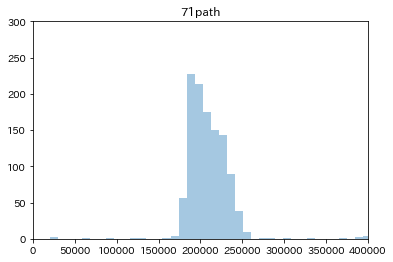

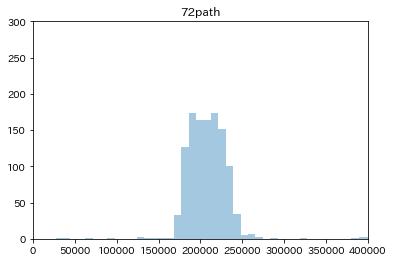

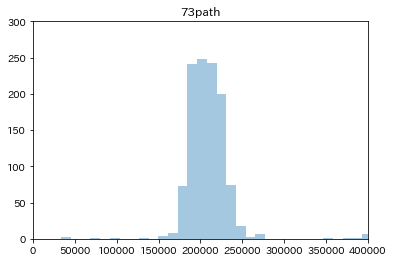

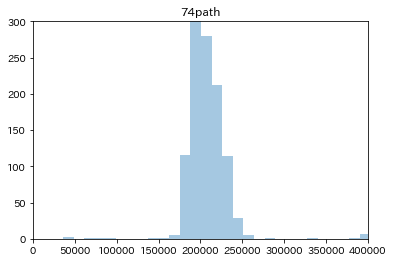

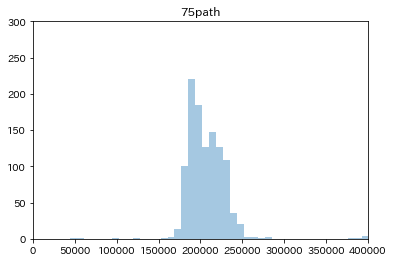

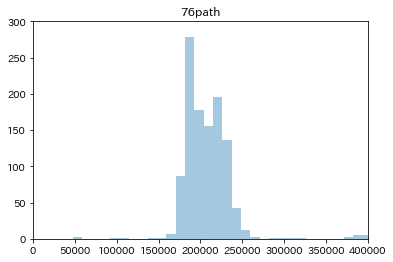

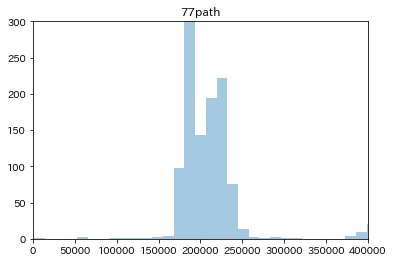

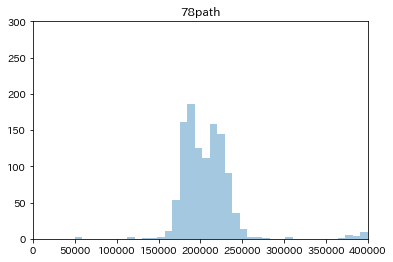

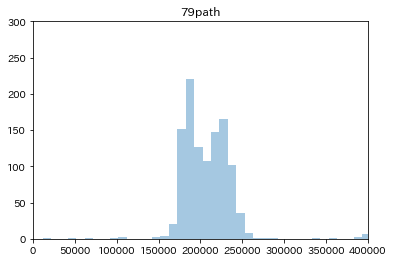

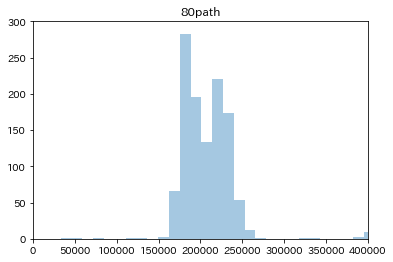

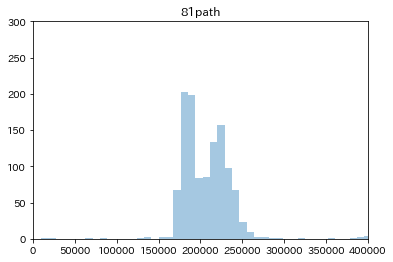

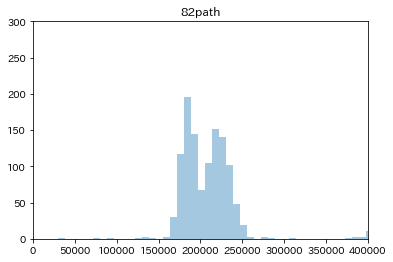

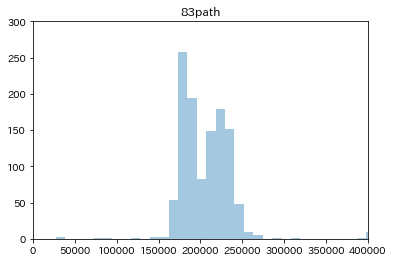

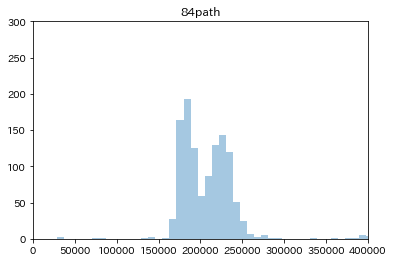

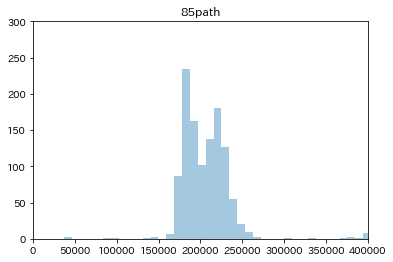

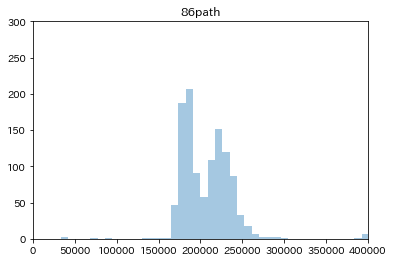

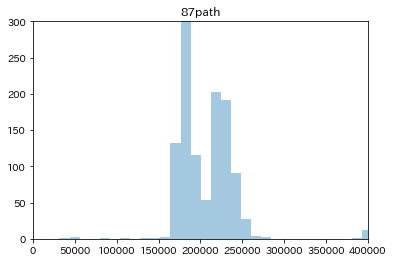

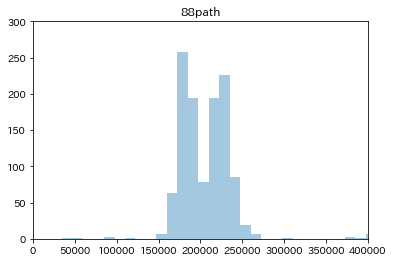

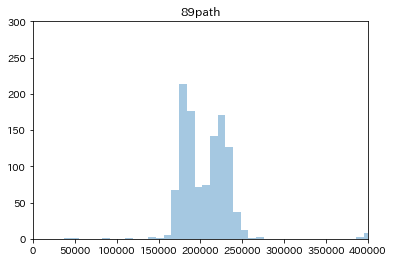

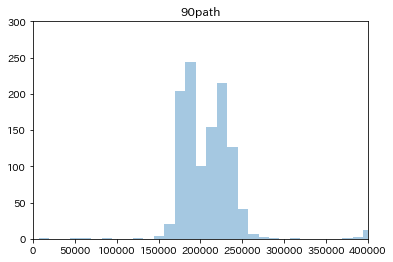

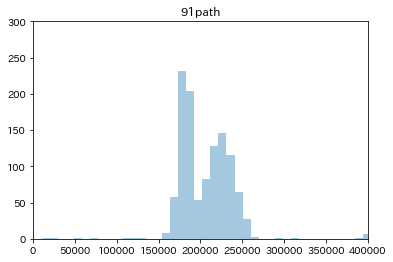

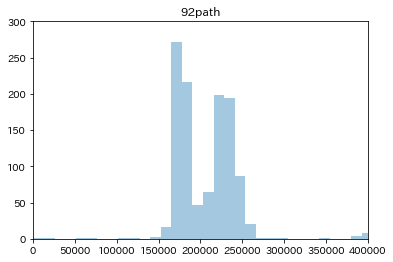

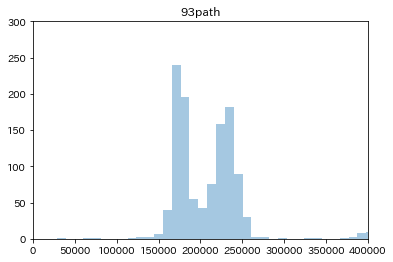

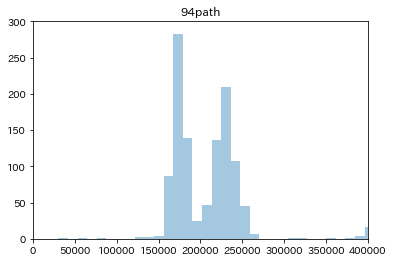

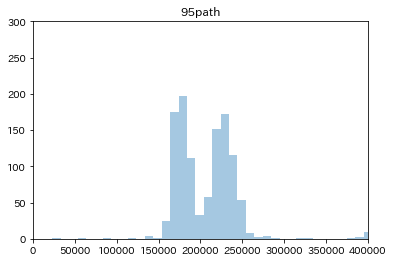

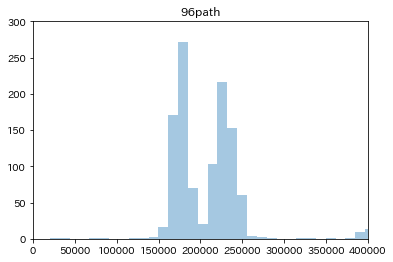

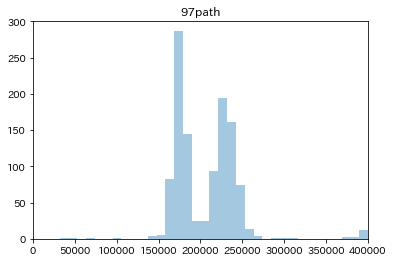

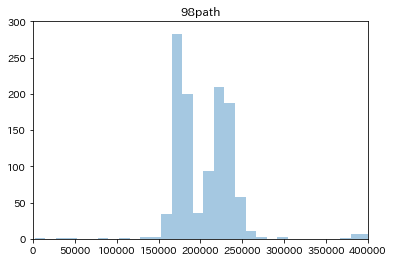

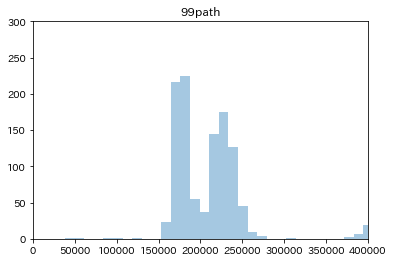

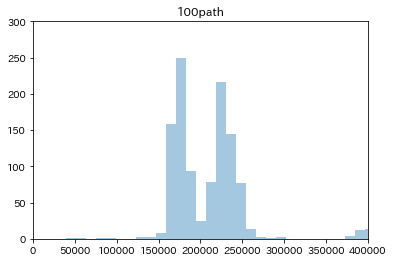

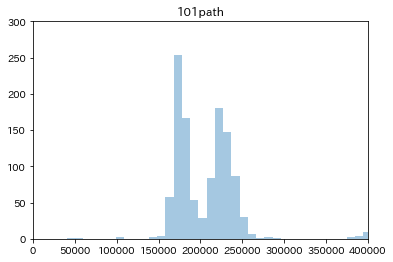

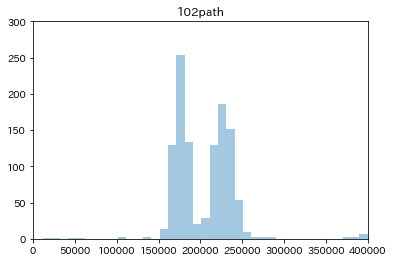

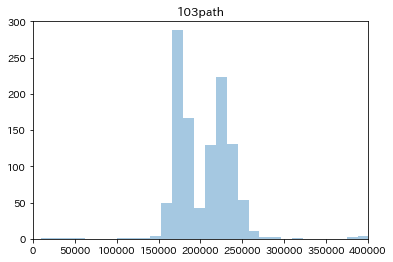

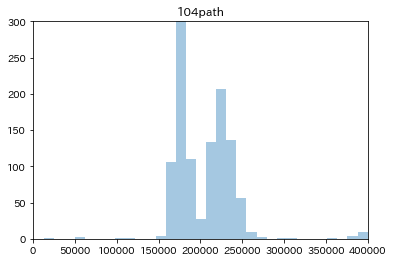

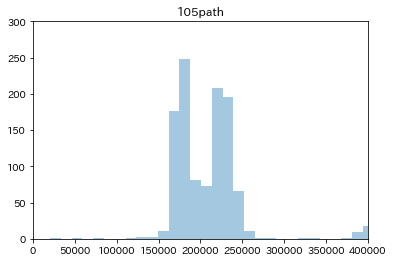

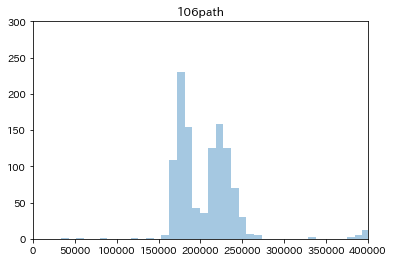

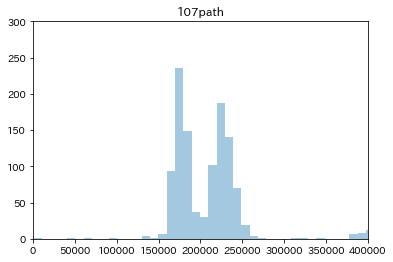

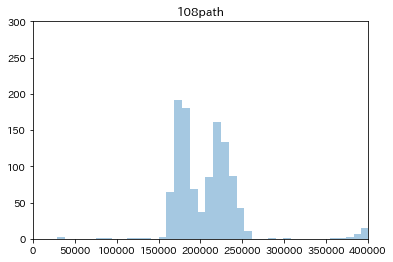

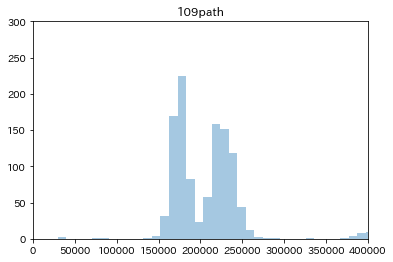

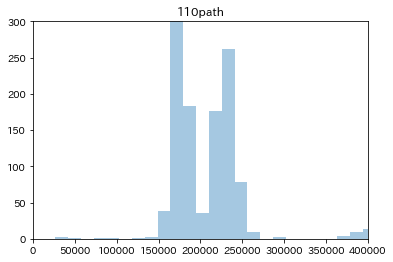

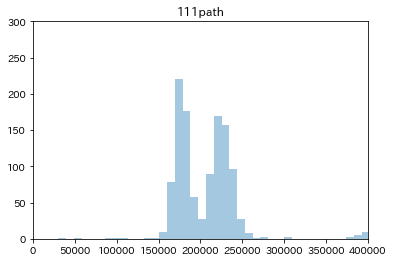

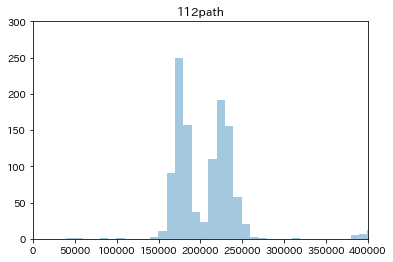

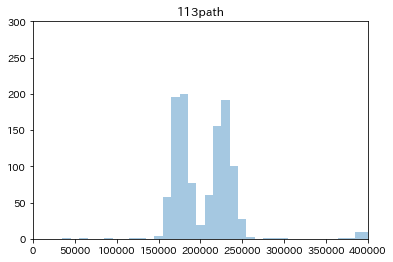

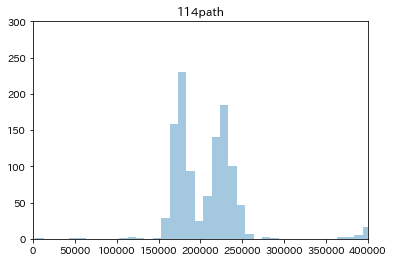

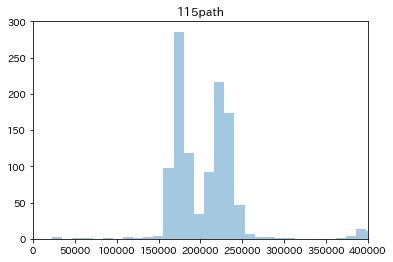

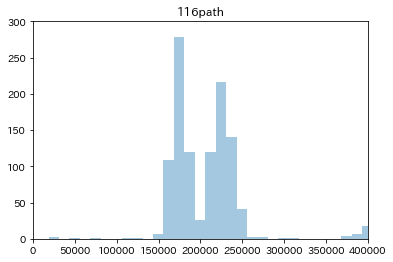

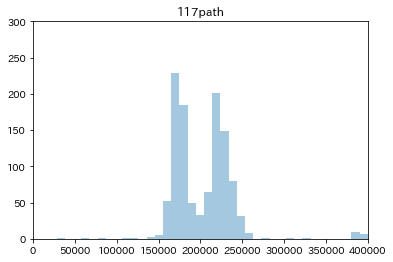

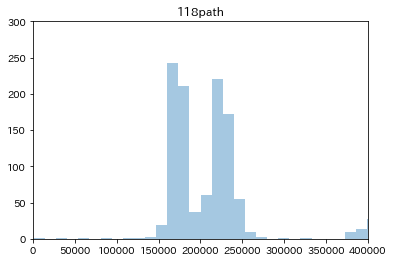

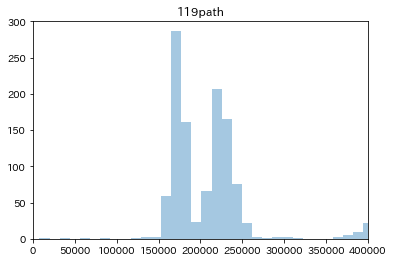

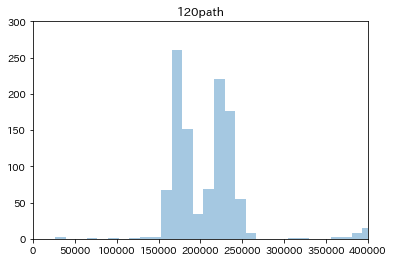

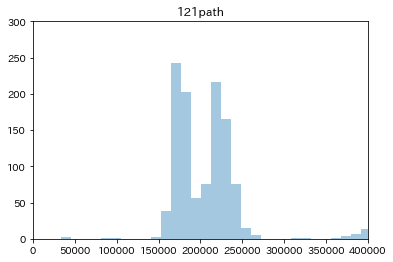

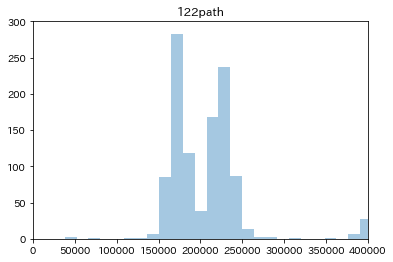

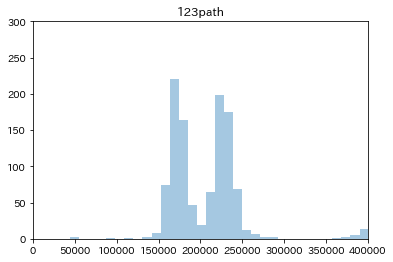

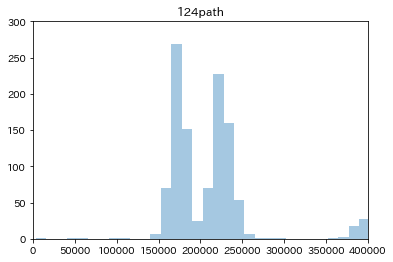

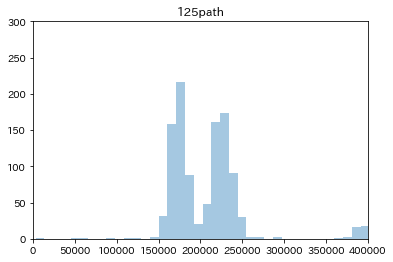

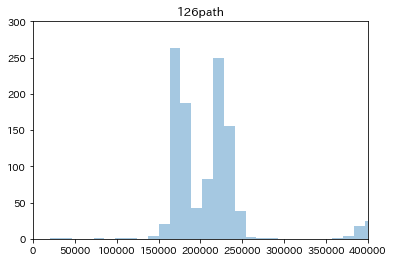

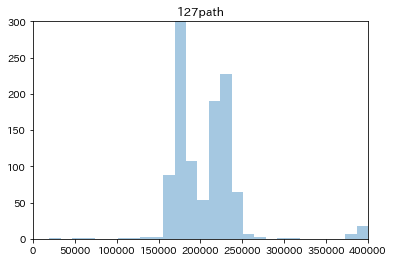

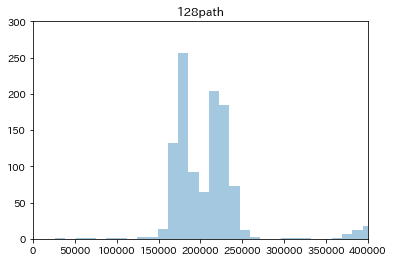

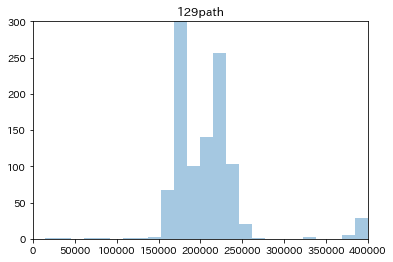

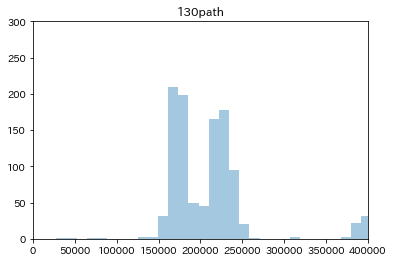

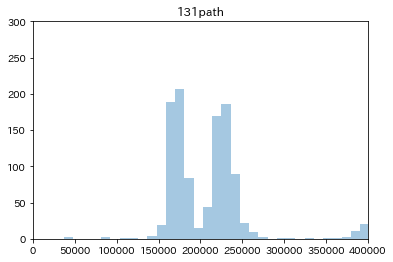

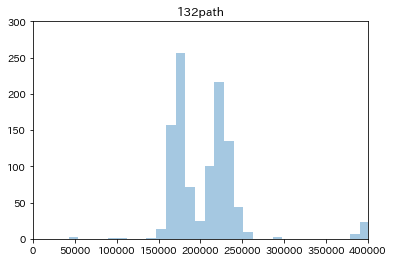

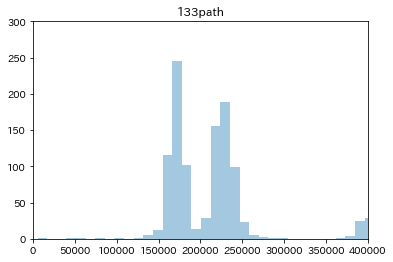

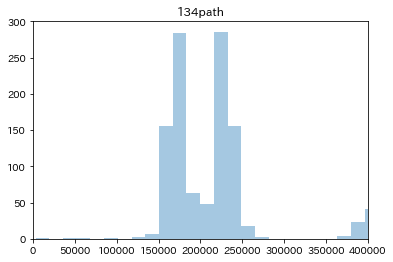

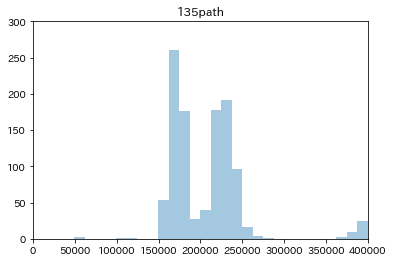

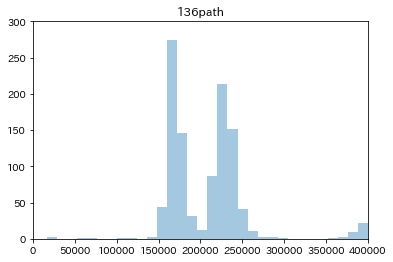

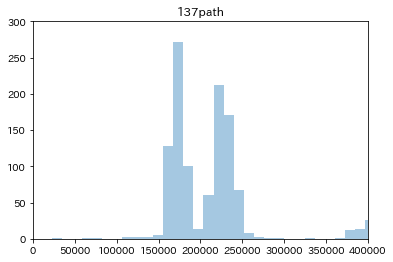

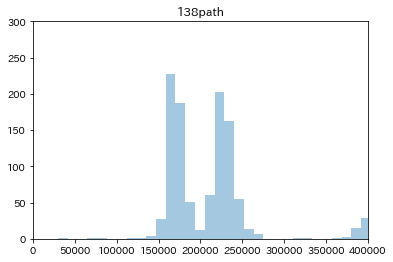

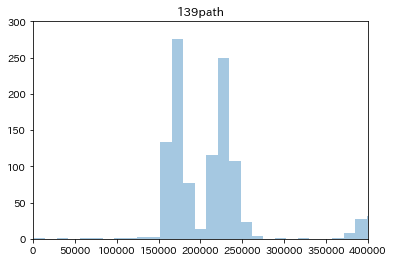

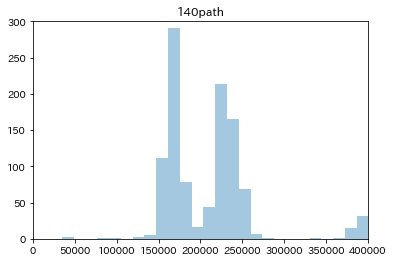

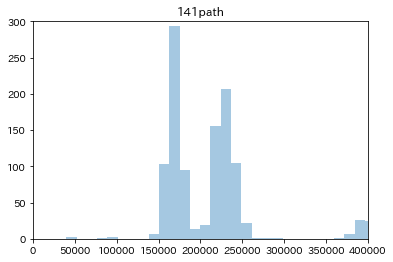

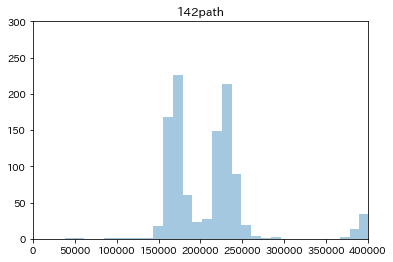

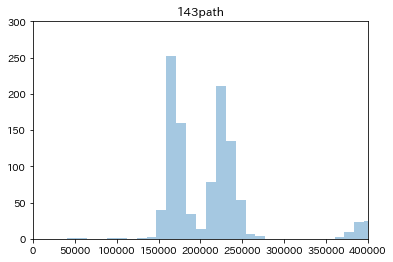

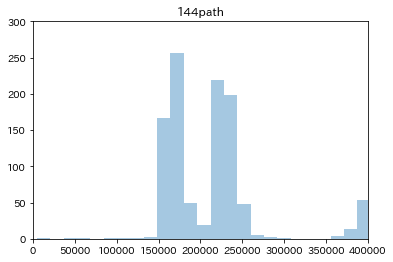

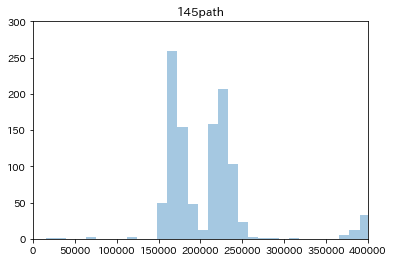

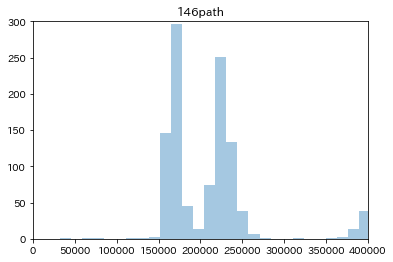

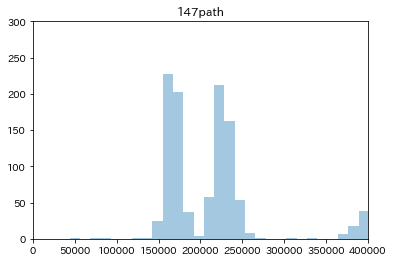

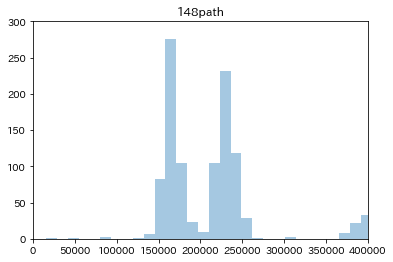

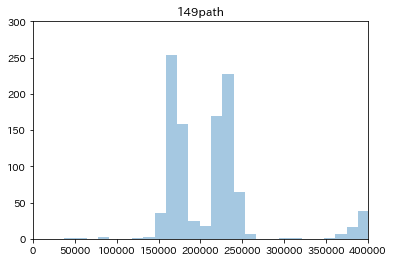

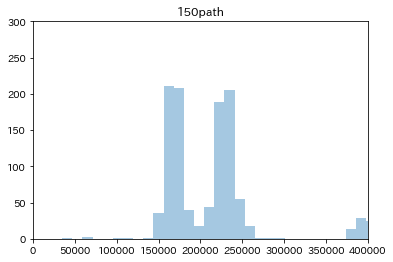

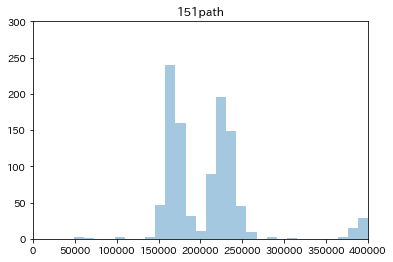

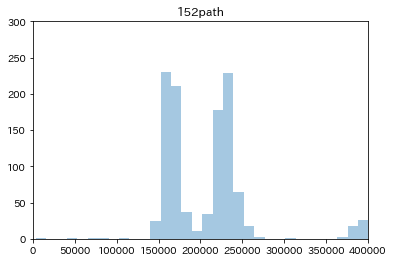

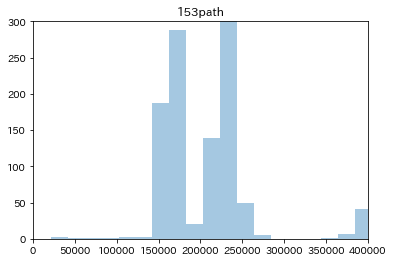

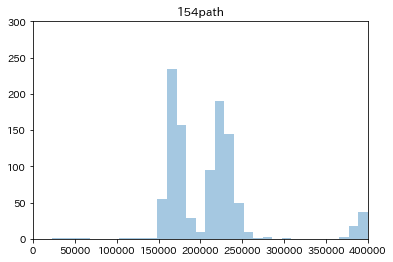

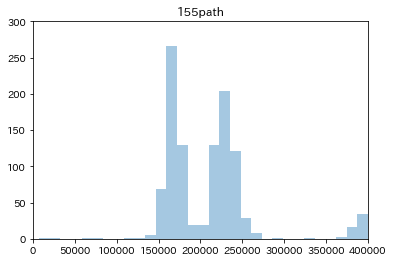

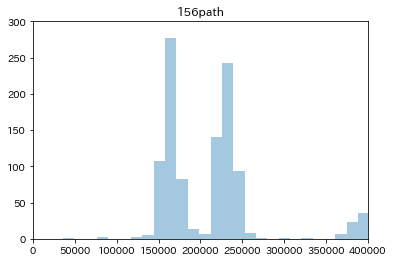

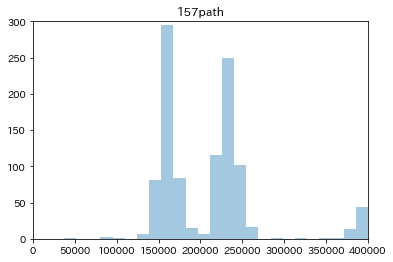

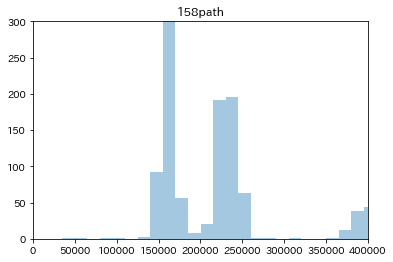

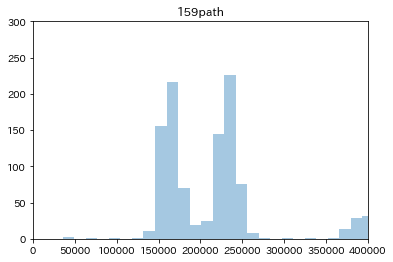

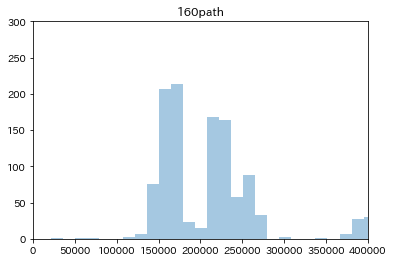

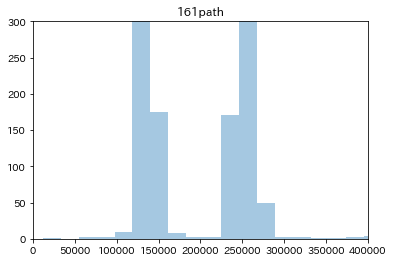

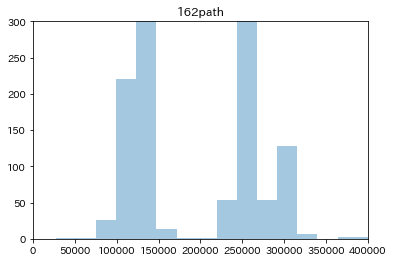

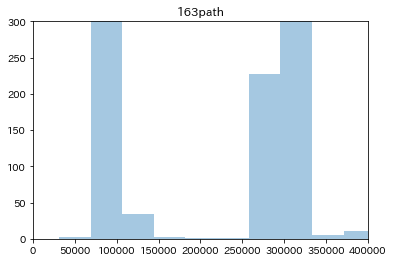

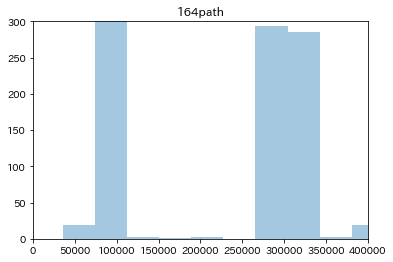

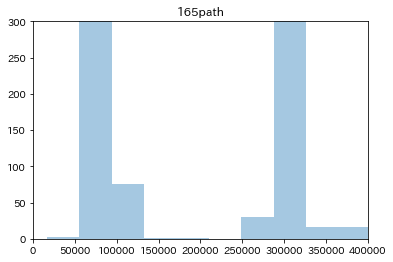

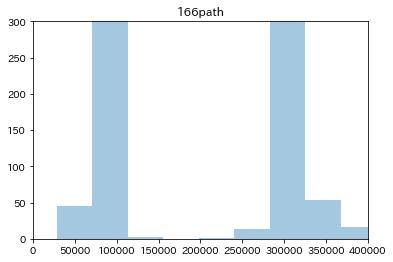

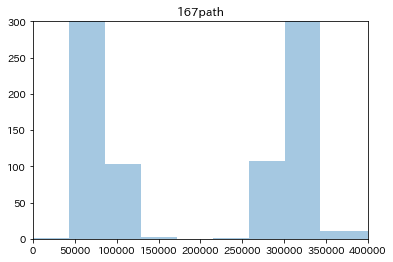

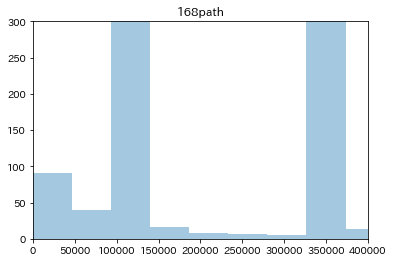

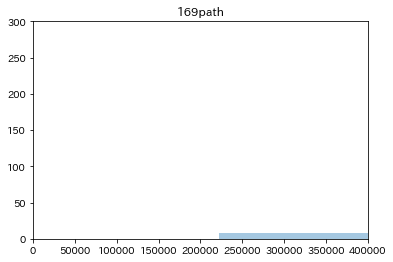

In [3]:
# zero_sample_num = []

for num in tqdm(range(1,170)):
    figure, ax = plt.subplots()
    
    #　データ読み込み
    cf = np.load(rf"Z:\200 Produced_data\20221027\CF\{num}.npy")
    
    #　負の値を0に
    cf[cf < 0] = 0
    
    #　移動平均でノイズ除去
    cf_m_avg = np.convolve(cf,v, mode='valid')
    cf_m_avg[cf_m_avg < 5] = 0

    
    #　0であるところのstartとendを特定する.高速ver
    cf_w = np.where(cf_m_avg != 0)[0]
    cf_wd = cf_w[1:] - cf_w[:-1]
    cf_wdd = np.where(cf_wd > 1600)[0]
    cf_wdd = cf_wdd + 1
    
#     cf_w = np.where(cf != 0)[0]
#     cf_wd = cf_w[1:] - cf_w[:-1]
# #     cf_wdd = np.where(cf_wd != 1)[0]
#     cf_wdd = np.where(cf_wd > 1600)[0]
# #     cf_wdd = np.where(cf_wd > 2000)[0]
#     cf_wdd = cf_wdd + 1
    
#     zero_sample_num.append(cf_wdd)
    
    
    #　面積計算
    menseki = []
    #　最初の回転の面積
    menseki.append(np.sum(np.array(cf_m_avg[0:cf_w[cf_wdd[0]]])))
    
    #　最初と最後以外の面積
    for i in range(len(cf_wdd)-1):
        menseki.append(np.sum(np.array(cf_m_avg[cf_w[cf_wdd[i]]:cf_w[cf_wdd[i+1]]])))
        
    #　最後の回転の面積
    menseki.append(np.sum(np.array(cf_m_avg[cf_w[cf_wdd[-1]] : len(cf_m_avg)])))

    #　1path分の面積データ.npy保存
    np.save(rf"Z:\200 Produced_data\20221027\CF\menseki\npy\100&1600\{num}", np.array(menseki))
#     np.save(rf"Z:\200 Produced_data\20221027\CF\menseki\npy\100&1600\{num}", np.array(menseki))

    
    #　1path分の面積ヒストグラム生成
    ax.set_ylim(0, 300)
    ax.set_xlim(0, 400000)
    hist_p = sns.distplot(menseki, kde=False, rug=False)
    figure = hist_p.get_figure()
    hist_p.set_title(rf"{num}path")
    figure.savefig(rf"Z:\200 Produced_data\20221027\CF\menseki\fig\100&1600\{num}.png")

In [318]:
a = np.array(zero_sample_num, dtype=object)

In [319]:
a = a.reshape(-1)
h = a[1:] - a[:-1]
print(len(a))
plt.plot(h, marker=".")
# plt.hist(h)

1206


In [311]:
%matplotlib qt
cf = np.load(rf"Z:\200 Produced_data\20221027\CF\1.npy")
t = np.where(cf < 0, 0, cf)

#　負の値を0に
# t[t < 0] = 0

#　移動平均でノイズ除去
cf_m_avg = np.convolve(t,v, mode='valid')
cf_m_avg[cf_m_avg < 5] = 0

# plt.plot(cf[:8333*10])
# plt.plot(cf_m_avg[:8333*10])
# plt.plot(t[:8333*10])

plt.plot(cf)
plt.plot(cf_m_avg)
# plt.plot(t)


In [23]:
cf = np.load(rf"Z:\200 Produced_data\20221027\CF\1.npy")
t = np.where(cf > 0, cf, 0)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)